# A/B Test Data (Kaggle)

For this project there will be a single dataset that was downloaded from [Kaggle](https://www.kaggle.com/datasets/sergylog/ab-test-data), there is no specific information about how or where the data was obtained from. It is only stated that the data was from a site that launched an A/B test in order to increase income. This project will be organised into the following sections:

- [1.0 Discussing the dataset](#10-discussing-the-dataset)
- [2.0 Importing Libraries](#20-importing-libraries)
- [3.0 Gathering the data](#30-gathering-the-data)
- [4.0 Assessing the data](#40-assessing-the-data)
- [5.0 Cleaning](#50-cleaning)
- [6.0 Storing](#60-storing)
- [7.0 Analysing](#70-analysing)

## 1.0 Discussing the dataset

The dataset only has 3 variables:

- *USER_ID*: it states the user ID of the user.
- *VARIANT_NAME*: it states if the user was part of the variant or control group.
- *REVENUE*: it states the revenue generated by the user.

## 2.0 Importing Libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st

## 3.0 Gathering the data

In [88]:
df = pd.read_csv('AB_Test_Results.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


## 4.0 Assessing the data

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [90]:
df.nunique()

USER_ID         6324
VARIANT_NAME       2
REVENUE          101
dtype: int64

In [91]:
#Count the number of users that repeated the test either in the same and/or different groups.
filter_list = []
known = {}
for index, row in df.iterrows():
    entry = known.get(row.USER_ID)
    if entry != None and entry != row.VARIANT_NAME:
        filter_list.append(row.USER_ID)
    known[row.USER_ID] = row.VARIANT_NAME
len(filter_list)

1829

Text(0, 0.5, 'Revenue($)')

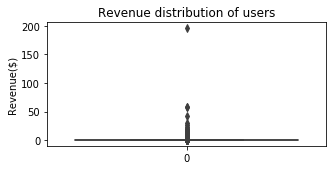

In [92]:
# Visually check for outliers
plt.figure(figsize=[5,5])
plt.subplot(2,1,1)
sns.boxplot(data=[df.REVENUE])
plt.title('Revenue distribution of users')
plt.ylabel('Revenue($)')

### 4.1 Comments on Assessment
- Data is not missing any values.
- Variables have the correct data type.
- Several users (3676) repeated the test in the same or different group as previously.
  - Several users (1829) repeated the test at least once in both groups
- Presence of Outliers (Revenue>150)

## 5.0 Cleaning
In this section of the report, a cleaning of the dataset according to the findings during the assessment wil be made.

In [93]:
df_clean = df

### 5.1 Several users repeated the test at least once in both groups

#### 5.1.1 Define
Several users had repeated the test several times and for both test groups, this makes all of these users results invalid.

The reason why **all** of the duplicated user results would be invalid is because there is no data to determine which test was his first.

#### 5.1.2 Code

In [94]:
df_clean = df_clean.loc[~df_clean['USER_ID'].isin(filter_list)]

In [95]:
Check1 = []
filter_list2 = []
for index, row in df_clean.iterrows():
    if row.USER_ID not in Check1:
        Check1.append(row.USER_ID)
    else:
        filter_list2.append(row.USER_ID)

df_clean = df_clean.loc[~df_clean['USER_ID'].isin(filter_list2)]

#### 5.1.3 Test

In [96]:
df_clean

,USER_ID,VARIANT_NAME,REVENUE
4,6174,variant,0.0
5,2380,variant,0.0
7,9168,control,0.0
10,8395,control,0.0
12,7165,control,0.0
...,...,...,...
9988,428,control,0.0
9991,8864,variant,0.0
9996,502,variant,0.0
9998,7741,control,0.0


In [97]:
df_clean.nunique()

USER_ID         3664
VARIANT_NAME       2
REVENUE           48
dtype: int64

### 5.2 Outliers

#### 5.2.1 Define
The dataframe has outliers that can be easily removed with a filer.

#### 5.2.2 Code

In [98]:
df_clean=df_clean[df_clean.REVENUE<100]

#### 5.2.3 Test

In [99]:
df_clean.describe()

,USER_ID,REVENUE
count,3663.000000,3663.000000
mean,5008.797161,0.071215
std,2898.094623,0.865208
min,4.000000,0.000000
25%,2478.000000,0.000000
50%,5009.000000,0.000000
75%,7536.500000,0.000000
max,9998.000000,23.040000


Text(0, 0.5, 'Revenue($)')

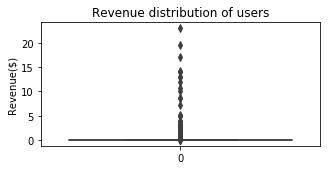

In [100]:
plt.figure(figsize=[5,5])
plt.subplot(2,1,1)
sns.boxplot(data=[df_clean.REVENUE])
plt.title('Revenue distribution of users')
plt.ylabel('Revenue($)')

## 6.0 Storing
In this step we will store the cleaned dataset as a var csv file.

In [101]:
df_clean.to_csv('AB_Test_Results_Cleaned.csv')

## 7.0 Analysis


In this section of the report we will be finding insights of the dataset and also performing some A/B testing analytics.

In [102]:
# What was the proportion of users that provided any revenue?
df_rev_0 = df_clean[df_clean.REVENUE == 0]
df_rev_n0 = df_clean[df_clean.REVENUE != 0]

# What was the proportion of users that provided any revenue from the control group?
df_control = df_clean[df_clean.VARIANT_NAME == 'control']
df_con_0 = df_control[df_control.REVENUE == 0]
df_con_n0 = df_control[df_control.REVENUE != 0]

# What was the proportion of users that provided any revenue from the variant group?
df_variant = df_clean[df_clean.VARIANT_NAME == 'variant']
df_var_0 = df_variant[df_variant.REVENUE == 0]
df_var_n0 = df_variant[df_variant.REVENUE != 0]

all_rev_prop_0 = len(df_rev_0.REVENUE)/len(df_clean.REVENUE)
all_rev_prop_n0 = len(df_rev_n0.REVENUE)/len(df_clean.REVENUE)
con_rev_prop_0 = len(df_con_0.REVENUE)/len(df_control.REVENUE)
con_rev_prop_n0 = len(df_con_n0.REVENUE)/len(df_control.REVENUE)
var_rev_prop_0 = len(df_var_0.REVENUE)/len(df_variant.REVENUE)
var_rev_prop_n0 = len(df_var_n0.REVENUE)/len(df_variant.REVENUE)

print('Proportion of overall users that generated 0 revenue:',all_rev_prop_0*100,'%','\n','Proportion of overall users that did not generate 0 revenue:',all_rev_prop_n0*100,'%','\n',
'Proportion of control users that generated 0 revenue:',con_rev_prop_0*100,'%','\n','Proportion of control users that did not generate 0 revenue:',con_rev_prop_n0*100,'%','\n',
'Proportion of variant users that generated 0 revenue:',var_rev_prop_0*100,'%','\n','Proportion of variant users that did not generate 0 revenue:',var_rev_prop_n0*100,'%')


Proportion of overall users that generated 0 revenue: 98.44389844389845 % 
 Proportion of overall users that did not generate 0 revenue: 1.556101556101556 % 
 Proportion of control users that generated 0 revenue: 98.41789416257501 % 
 Proportion of control users that did not generate 0 revenue: 1.5821058374249863 % 
 Proportion of variant users that generated 0 revenue: 98.46994535519126 % 
 Proportion of variant users that did not generate 0 revenue: 1.530054644808743 %


Text(0.5, 0, 'Revenue ($)')

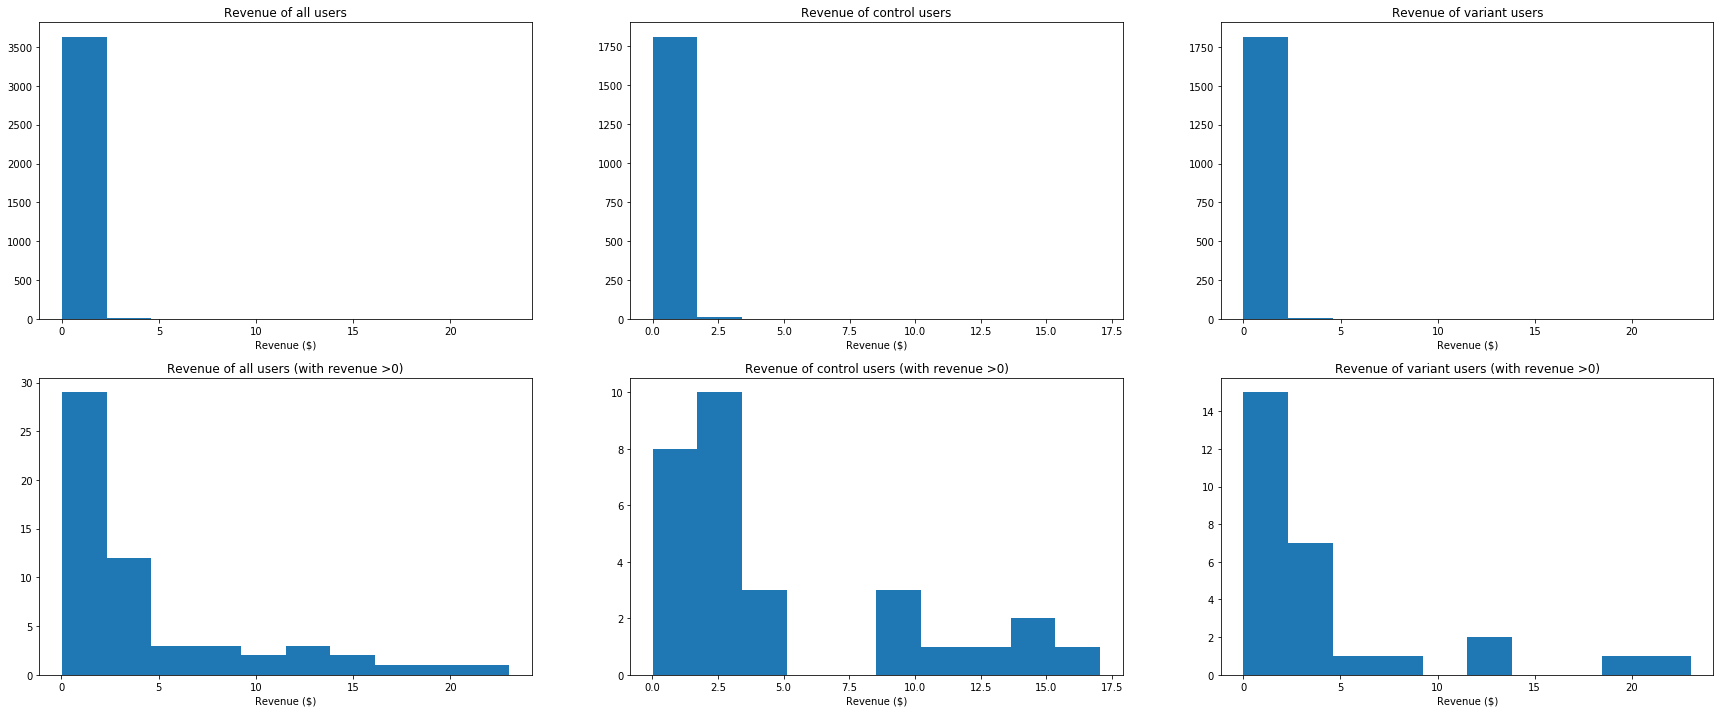

In [103]:
plt.figure(figsize=[30,12])
plt.subplot(2,3,1)
plt.hist(df_clean.REVENUE)
plt.title('Revenue of all users')
plt.xlabel('Revenue ($)')
plt.subplot(2,3,2)
plt.hist(df_control.REVENUE)
plt.xlabel('Revenue ($)')
plt.title('Revenue of control users')
plt.subplot(2,3,3)
plt.hist(df_variant.REVENUE)
plt.title('Revenue of variant users')
plt.xlabel('Revenue ($)')
plt.subplot(2,3,4)
plt.hist(df_rev_n0.REVENUE)
plt.title('Revenue of all users (with revenue >0)')
plt.xlabel('Revenue ($)')
plt.subplot(2,3,5)
plt.hist(df_con_n0.REVENUE)
plt.xlabel('Revenue ($)')
plt.title('Revenue of control users (with revenue >0)')
plt.subplot(2,3,6)
plt.hist(df_var_n0.REVENUE)
plt.title('Revenue of variant users (with revenue >0)')
plt.xlabel('Revenue ($)')

Most of the users (either overall, control group orn variant) generate a null revenue and at first instance it would seem like control users would have a slight higher chance of getting users to generate more revenue than the variant group. However, this will be further explored in the next sections.

In [104]:
print('Average and median of Revenue generated from overall users (that generated revenue):',st.mean(df_rev_n0.REVENUE), st.median(df_rev_n0.REVENUE),'\n',
'Average and median of Revenue generated from control users (that generated revenue):',st.mean(df_con_n0.REVENUE), st.median(df_con_n0.REVENUE),'\n',
'Average and median of Revenue generated from variant users (that generated revenue):',st.mean(df_var_n0.REVENUE), st.median(df_var_n0.REVENUE))

Average and median of Revenue generated from overall users (that generated revenue): 4.576491228070175 2.27 
 Average and median of Revenue generated from control users (that generated revenue): 4.794827586206897 2.34 
 Average and median of Revenue generated from variant users (that generated revenue): 4.350357142857143 2.2199999999999998


Text(0, 0.5, 'Revenue($)')

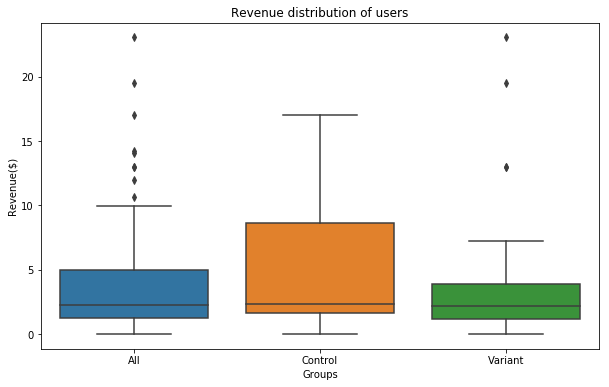

In [105]:
plt.figure(figsize=[10,6])
sns.boxplot(data=[df_rev_n0.REVENUE,df_con_n0.REVENUE,df_var_n0.REVENUE]).set_xticklabels(['All','Control','Variant'])
plt.title('Revenue distribution of users')
plt.xlabel('Groups')
plt.ylabel('Revenue($)')


For average, the control users generated a higher revenue than the variant users; However for the median the difference would not be as large as it was for the average.

For now it would seem that the control users did generate a higher revenue both in sales and volume compared to the variant. Nevertheless, we still have to consider doing our actual A/B test analysis.

## 8.0 A/B Testing

Since the initial analysis showed that the control users generated a higher revenue than the variant users we will make our null hypothesis ($H_0$) that the control is going to generate more or equal revenue to the variant whilst the alternative hypothesis ($H_1$) is that the variant would generate more revenue than the control.

>$$H_0: p_{con} - p_{var} \geq 0$$


>$$H_1: p_{con} - p_{var} < 0$$

$p_{con}$ and $p_{var}$ meaning the probability of generating a higher revenue with the control and the variant respectively.

### 8.1 Null Hypothesis ($H_0$) testing

Under the null hypothesis we assume the following:

>$$p_{var} = p_{con}$$

To confirm this hypothesis we will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 

In [106]:
# Number of total users
n_t = df_clean.shape[0]

#Number of users in control group
n_con =  df_control.shape[0]

#Number of users in variant group
n_var = df_variant.shape[0]

#Probability of generating revenue in control group
p_con = df_con_n0.shape[0] / df_control.shape[0]

#Probability of generating revenue in variant group
p_var = df_var_n0.shape[0] / df_variant.shape[0]

print('n_T =',n_t,'\n','n_con =',n_con,'\n','n_var =',n_var,'\n','p_con =',p_con*100,'\n','p_var =',p_con*100)

n_T = 3663 
 n_con = 1833 
 n_var = 1830 
 p_con = 1.5821058374249863 
 p_var = 1.5821058374249863


#### 8.1.1 Simulate sample variable group

Simulate $n_{var}$ transactions with a conversion rate of $p_{var}$ under the null hypothesis.  <br><br>

In [107]:
var_converted = np.random.choice([1,0],size=n_var,p=(p_var,(1-p_var)))
var_unique , var_count = np.unique(var_converted,return_counts=True)
var_nrev , var_rev = np.split(var_count,2)

#### 8.1.2 Simulate sample control group

Simulate $n_{con}$ transactions with a conversion rate of $p_{con}$ under the null hypothesis.  <br><br>

In [108]:
con_converted = np.random.choice([1,0],size=n_con,p=(p_con,(1-p_con)))
con_unique , con_count = np.unique(con_converted,return_counts=True)
con_nrev , con_rev = np.split(con_count,2)

#### 8.1.3 Difference in the "converted" probability $(p{'}_{var}$ - $p{'}_{con})$

In [109]:
var_rev_p = int(var_rev)/ int(var_rev+var_nrev)
con_rev_p = int(con_rev)/ int(con_rev+con_nrev)
var_rev_p - con_rev_p

0.0027545991968733526

#### 8.1.4 Performing a sampling distribution
In this section we are essentially going to repeat steps 8.1.1 to 8.1.3 10,000 times to recreate a dataset

In [110]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    var_converted = np.random.choice([1,0],size=n_var,p=(p_var,(1-p_var)))
    var_unique , var_count = np.unique(var_converted,return_counts=True)
    var_ncon , var_con = np.split(var_count,2)
    con_converted = np.random.choice([1,0],size=n_con,p=(p_con,(1-p_con)))
    con_unique , con_count = np.unique(con_converted,return_counts=True)
    con_ncon , con_con = np.split(con_count,2)
    var_con_p = int(var_con)/ int(var_con+var_ncon)
    con_con_p = int(con_con)/ int(con_con+con_ncon)
    p_diffs.append(var_con_p - con_con_p)
p_diffs

[-0.005434967311493297,
 0.006026132918354753,
 -0.0005240893277168122,
 0.00439662651033422,
 -0.0005187232253852404,
 -0.003801883501918381,
 -0.0005223006269396216,
 -0.003805460903472762,
 2.325311010347754e-05,
 0.0022117285109960402,
 0.0005705955479237655,
 -0.007071628522622593,
 0.0027528104960961603,
 -0.0021571731372917267,
 -0.0005160401742194537,
 -0.0005267723788825989,
 0.005488628334809011,
 -0.004342965487018503,
 0.0005705955479237655,
 0.00330015293391645,
 0.007127078246715497,
 0.002758176598427732,
 0.0038474953717367397,
 2.1464409326285225e-05,
 -0.004336705034298338,
 2.861921243504928e-05,
 0.0016679634747301317,
 0.0005697011975351711,
 -0.002156278786903134,
 -0.0016178798529687972,
 -0.005433178610716108,
 -0.0037929399980324296,
 -0.0005196175757738383,
 0.0005643350952035976,
 -0.003250069312155114,
 0.002751916145707566,
 -0.007076100274565568,
 0.0027590709488163265,
 0.001670646525895915,
 0.0022090454598302535,
 -0.004340282435852719,
 -0.005430495559

#### 8.1.5 Histogram - Plotting the sampling distribution

(array([  19.,  157.,  744., 2007., 3013., 2520., 1166.,  324.,   46.,
           4.]),
 array([-0.01483439, -0.01167282, -0.00851125, -0.00534968, -0.0021881 ,
         0.00097347,  0.00413504,  0.00729661,  0.01045818,  0.01361976,
         0.01678133]),
 <a list of 10 Patch objects>)

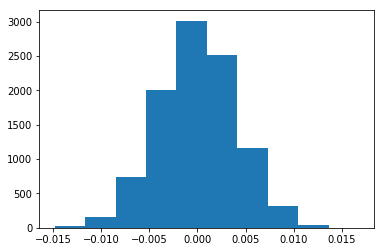

In [111]:
np.std(p_diffs)
null_vals = np.random.normal(0,np.std(p_diffs),10000)
plt.hist(null_vals)

#### 8.1.6 Actual v simulated $p_{values}$
We now calculate proportion of values of $p_{diffs}$ that is greater than the actual difference.

In [116]:
p_diffs_actual = df_var_n0.shape[0] / df_variant.shape[0] - df_con_n0.shape[0]/df_control.shape[0]
p_value = (p_diffs_actual < np.array(p_diffs)).mean()
print('p_value =',p_value)

p_value = 0.4991


#### 8.1.7 Null hypothesis conclusion

$p_{value}$ is the probability of getting the actual result considering that the null hypothesis is true.

In this case because the $p_{value}$ is higher than 0.05 (standard value for rejection); we have failed to reject the null hypothesis.

### 8.2 Regression Approach

In order to be certain about our conclusions drawn from the previous analysis, we will be performing another analysis using a regression approach.

In this case, since how we are evaluating the data is based on whether it has generated revenue or not (currently not considering the amount of revenue)